<a href="https://colab.research.google.com/github/alinakhaee/MNIST-Learning/blob/main/Decission_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading The Dataset
in this section I impoerted the librarires and loaded the MNIST dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Training matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Training matrix shape (10000, 784)


# Decision Tree
I used the `sklearn` python library for using the Decision Tree. <br>
This algorithm takes the `criterion` (default is *'gini'*) <br>
And also there are more parameters which are:

*   `max_depth` : <br>
The maximum depth of the tree while training. <br>
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples. <br>
🟣 default value: None

*   `min_samples_split` : <br>
The minimum number of samples required to split an internal node <br>
🟣 default value: 2 <br>

*   `min_samples_leaf` : <br>
The minimum number of samples required to be at a leaf node. <br>
A split point at any depth will only be considered if it leaves at least `min_samples_leaf` of the training samples in each of the left and right branches. <br>
🟣 default value: 1 <br>



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, adjusted_rand_score

def do_decision_tree(decision_tree: DecisionTreeClassifier, print_result= True):
    decision_tree.fit(X_train, y_train)
    train_predict = decision_tree.predict(X_train)
    test_predict = decision_tree.predict(X_test)
    train_purity = accuracy_score(train_predict, y_train)
    train_rand_index = adjusted_rand_score(train_predict, y_train)
    test_purity = accuracy_score(test_predict, y_test)
    test_rand_index = adjusted_rand_score(test_predict, y_test)
    if print_result:
        print(f'Train Data Purity : {round(train_purity * 100, 2)}%')
        print(f'Train Data Rand-Index : {round(train_rand_index * 100, 2)}%')
        print(f'Test Data Purity : {round(test_purity * 100, 2)}%')
        print(f'Test Data Rand-Index : {round(test_rand_index * 100, 2)}%')

    return train_purity, train_rand_index, test_purity, test_rand_index

the above function is for doing the decision tree and start training. <br>
Just like the previous exercise, I extract this part as a function to perfom the same approach for different decision trees. <br>
But unlike the previous exercise, Decision Tree is a supervised leaning method, therefore we do not the label inference functions. (functions to infere the label of each cluster) <br>
After performing the training, I use the `predict()` function to test the train & test data of MNIST. <br>
And just like the previous exercise, I used the *Rand-Index* and *Purity* to measure the accuracy of learning. <br>

In [ ]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
import pydotplus

def visualize_tree(decision_tree: DecisionTreeClassifier, max_depth = 4):
    dot_data = StringIO()
    export_graphviz(decision_tree, out_file=dot_data, max_depth=max_depth)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    # return graph
    return Image(graph.create_png())

The `visualize_tree()` function is for visualizing and plotting the tree after the training. <br>
The `max_depth` parameter is the depth of the tree in the output image. <br>
If you increase that number you can see a deeper decision tree.

Train Data Purity : 100.0%
Train Data Rand-Index : 100.0%
Test Data Purity : 87.86%
Test Data Rand-Index : 75.48%


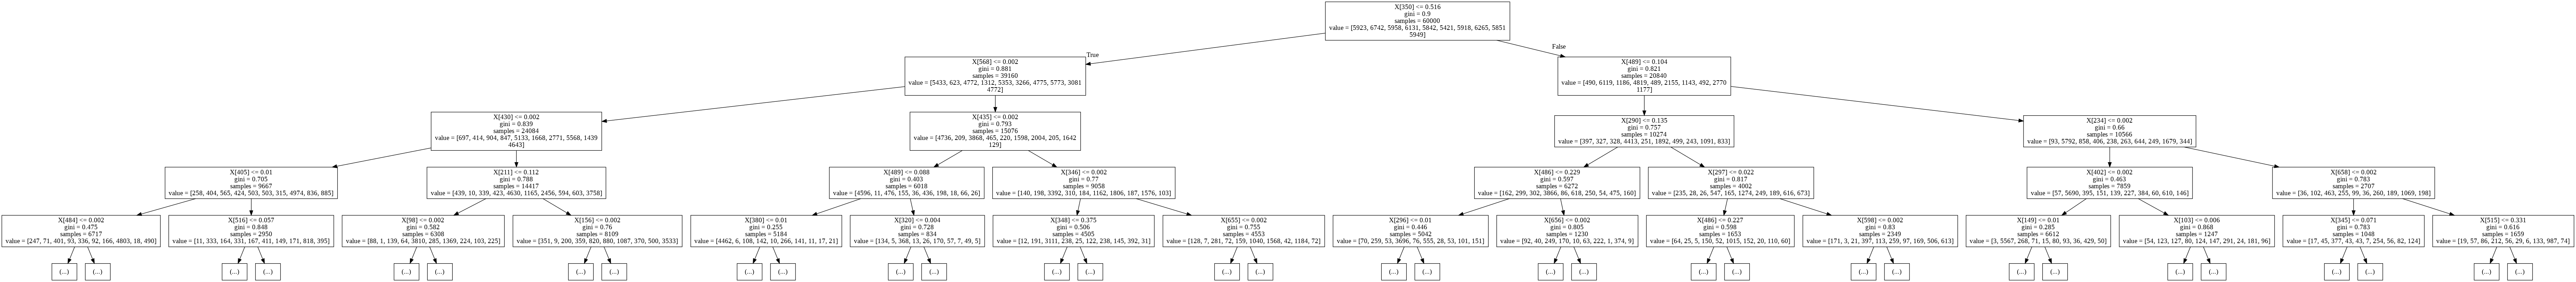

In [ ]:
decision_tree = DecisionTreeClassifier()
do_decision_tree(decision_tree, True)
visualize_tree(decision_tree, 4)

The above code is a simple decision tree with all the parameters set to their default value. <br>
and also you can see the final tree in the image. to see a deeper result you can increase the `max_depth` parameter. <br>
In the image you can see all the values such as the *Gini* value or the *Information Gain* of each step. <br>
The parameters are all set to default, which means: <br>
> criterion: gini <br>
> max_depth: None <br>
> min_samples_split: 2 <br>
> min_samples_leaf: 1 <br>

Since the `max_depth` parameter is None, which means as much deep as it require to cover all data, it is obvious that we would get 100% for the train data.<br>
But as you can see, for the test data it is 87% purity and 75% rand-index.


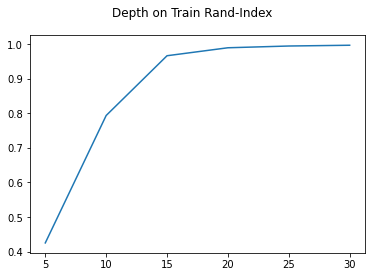

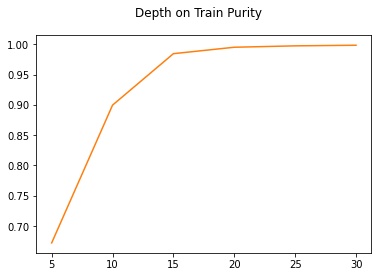

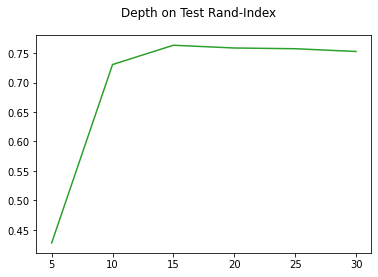

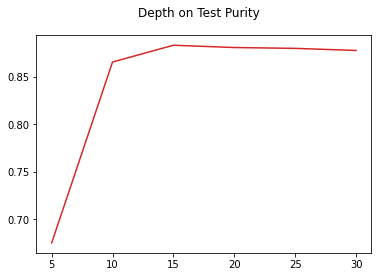

In [ ]:
max_depths = [5, 10, 15, 20, 25, 30]
train_rand_indexes = []
train_purities = []
test_rand_indexes = []
test_purities = []

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth=max_depth)
    train_purity, train_rand_index, test_purity, test_rand_index = do_decision_tree(decision_tree, print_result=False)
    test_rand_indexes.append(test_rand_index)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    train_purities.append(train_purity)

plt.plot(max_depths, train_rand_indexes)
plt.suptitle('Depth on Train Rand-Index')
plt.show()
plt.plot(max_depths, train_purities, 'tab:orange')
plt.suptitle('Depth on Train Purity')
plt.show()
plt.plot(max_depths, test_rand_indexes, 'tab:green')
plt.suptitle('Depth on Test Rand-Index')
plt.show()
plt.plot(max_depths, test_purities, 'tab:red')
plt.suptitle('Depth on Test Purity')
plt.show()

In the above code, I show the effect of the `max_depth` parameter on the accuracy of the decision tree. <br>
As you can see in the plots, increasing the `max_depth` will lead to better result in the train data. <br>
But for the test data, after `max_depth=15` we lose a little accuracy instead of gaining it. <br>
Also by comparing the result of `max_depth=15` to the previous code block which `max_depth=None`, we can infer that by just creating 15 level of tree depth, we can gain that much accuracy as we would get by creating the whole tree. <br>
Therefore we choose 15 for `max_depth` in our next code blocks, because it gives the best possible result but in a faster time.

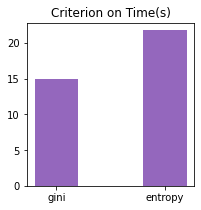

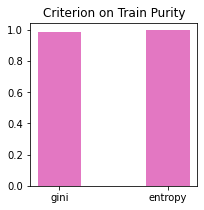

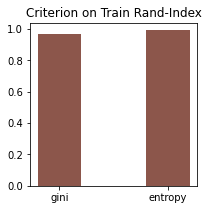

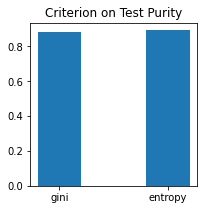

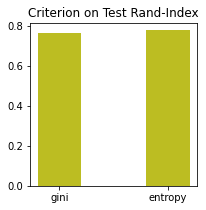

In [ ]:
import time

def show_bar_chart(x, y, title, color):
    fig = plt.figure(figsize = (3, 3))
    plt.bar(x, y, color=color, width = 0.4)
    plt.title(title)
    plt.show()

criterions = ['gini', 'entropy']
times = []
train_rand_indexes = []
train_purities = []
test_rand_indexes = []
test_purities = []

for criterion in criterions:
    decision_tree = DecisionTreeClassifier(max_depth=15, criterion=criterion)
    start = time.time()
    train_purity, train_rand_index, test_purity, test_rand_index = do_decision_tree(decision_tree, print_result=False)
    test_rand_indexes.append(test_rand_index)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    train_purities.append(train_purity)
    times.append(time.time() - start)

show_bar_chart(criterions, times, 'Criterion on Time(s)', 'tab:purple')
show_bar_chart(criterions, train_purities, 'Criterion on Train Purity', 'tab:pink')
show_bar_chart(criterions, train_rand_indexes, 'Criterion on Train Rand-Index', 'tab:brown')
show_bar_chart(criterions, test_purities, 'Criterion on Test Purity', 'tab:blue')
show_bar_chart(criterions, test_rand_indexes, 'Criterion on Test Rand-Index', 'tab:olive')

In this code block you can see the difference between `'gini'` and `'entropy'` criterion types. <br>
As you can see, the `'entropy'` method, takes much more time, even by creating 15 level of the decision tree. <br>
This difference in execution time was expected. because according to the slides of this chapter,<br>

> ***'GINI has the advantage of being faster to compute, since entropy uses logarithm'*** <br>

but for the accuracy, we can't say there is a big difference between two criterions, however, as it is observable in the bar charts, `'entropy'` has a slightly better accuracy over the `'gini'` method.  

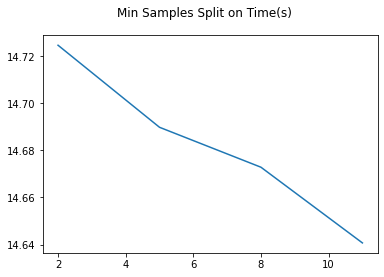

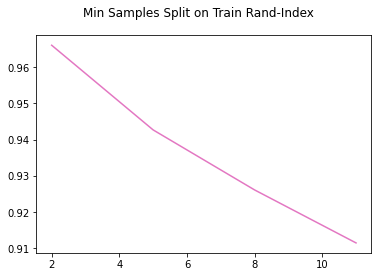

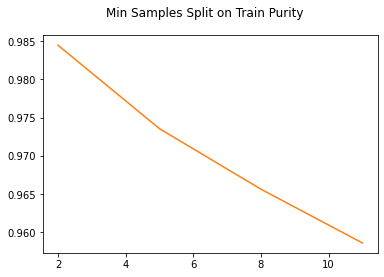

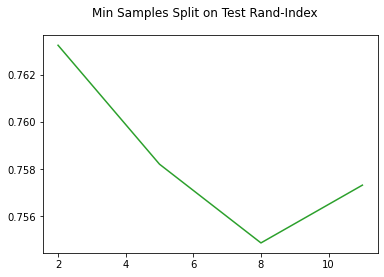

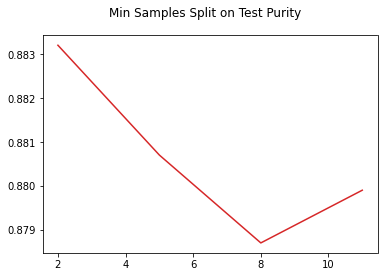

In [ ]:
min_samples_splits = [2, 5, 8, 11] # it must be greater than 1
times = []
train_rand_indexes = []
train_purities = []
test_rand_indexes = []
test_purities = []

for min_sample_split in min_samples_splits:
    decision_tree = DecisionTreeClassifier(max_depth=15, min_samples_split=min_sample_split)
    start = time.time()
    train_purity, train_rand_index, test_purity, test_rand_index = do_decision_tree(decision_tree, print_result=False)
    times.append(time.time() - start)
    test_rand_indexes.append(test_rand_index)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    train_purities.append(train_purity)

plt.plot(min_samples_splits, times)
plt.suptitle('Min Samples Split on Time(s)')
plt.show()
plt.plot(min_samples_splits, train_rand_indexes, 'tab:pink')
plt.suptitle('Min Samples Split on Train Rand-Index')
plt.show()
plt.plot(min_samples_splits, train_purities, 'tab:orange')
plt.suptitle('Min Samples Split on Train Purity')
plt.show()
plt.plot(min_samples_splits, test_rand_indexes, 'tab:green')
plt.suptitle('Min Samples Split on Test Rand-Index')
plt.show()
plt.plot(min_samples_splits, test_purities, 'tab:red')
plt.suptitle('Min Samples Split on Test Purity')
plt.show()

In the above code I detect effects of increasing the `min_samples_split` on the accuracy. <br>
which as you would have expected too, it decreases the accuracy, but not too much, however instead, it also decreases the execution time. <br>
however for this dataset, we don't have a problem for execution time, since creating 15 level of tree is just taking 15 seconds in the gini method and the accuracy is also in its best possible value. <br>
So we can infer that this parameter is not really necessary to change or not. 

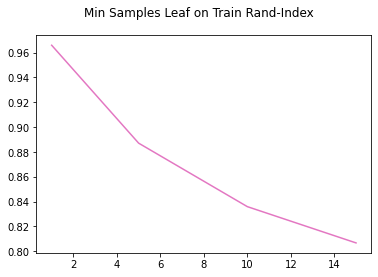

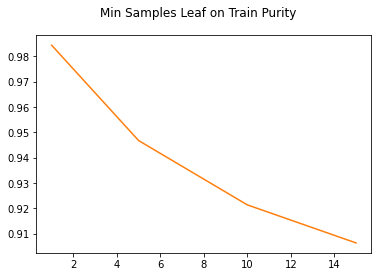

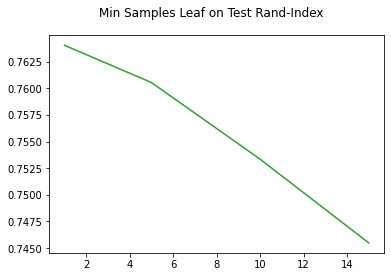

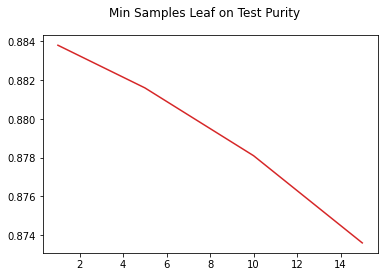

In [ ]:
min_samples_leaves = [1, 5, 10, 15]
train_rand_indexes = []
train_purities = []
test_rand_indexes = []
test_purities = []

for min_sample_leaf in min_samples_leaves:
    decision_tree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=min_sample_leaf)
    train_purity, train_rand_index, test_purity, test_rand_index = do_decision_tree(decision_tree, print_result=False)
    test_rand_indexes.append(test_rand_index)
    train_rand_indexes.append(train_rand_index)
    test_purities.append(test_purity)
    train_purities.append(train_purity)

plt.plot(min_samples_leaves, train_rand_indexes, 'tab:pink')
plt.suptitle('Min Samples Leaf on Train Rand-Index')
plt.show()
plt.plot(min_samples_leaves, train_purities, 'tab:orange')
plt.suptitle('Min Samples Leaf on Train Purity')
plt.show()
plt.plot(min_samples_leaves, test_rand_indexes, 'tab:green')
plt.suptitle('Min Samples Leaf on Test Rand-Index')
plt.show()
plt.plot(min_samples_leaves, test_purities, 'tab:red')
plt.suptitle('Min Samples Leaf on Test Purity')
plt.show()

The above code is showing the effect of `min_samples_leaf` parameter on accuracy. <br>
Just like `min_samples_split` parameter, it has negative effect on accuracy, however it is not much, and obviously it also reduces the execution time, since it detects leaves at a higher level. <br>
since we do not have a long-execution-time problem, we do not need to change this parameter.  

# What to Do To Make It Better?
After all the testing and all the opeartion, we find that the best output we can get is 87% Purity and 75% Rand-Index. <br>
We only infer that with `max_depth=15` and `critertion='entropy'` we can get the best possible result in only 15 seconds. <br>
But the question here is can we make it better?
The answer to this question is yes! <br>
<br>
<br>
The MNIST dataset has 60 thousand data with 784 nominal features. So this dataset can be considered as a large datset. <br>
We know that for a high dimensional database, like MNIST, decision tree can not give the best possible result. that's why we get 75% rand-index, even if we go as deep as required and training all the 60 thousand data.<br>
<br>
🟢**SOLUTION**🟢 <br>
What if we reduce the dimension of our dataset? <br>
The `sklearn` library provide us with all the dimension reduction algorithm such as PCA, TSVD, TNSE and many other algorithms. <br>
The TNSE algorithm is perfect for visualizing high dimensioned data. But it would take one week to reduce 784 features of 60 thousand data to 2 or 3 dimensions. <br>
Therefore we should first use PCA ot TSVD algorithms, which are faster, and reduce our data to 100 features for example, and then choose about 30 or 40 thousand of our data, and then reduce them to 2 dimension and finally perfom the decision tree. <br>


In [ ]:
import pandas as pd 
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=50).fit_transform(X_train[:40000])
tsne = TSNE()
transformed = tsne.fit_transform(tsvd) 
tsne_train = pd.DataFrame(transformed[:len(X_train)], columns=['component1', 'component2'])

In the code above, I used the `sklearn` TSVD and TSNE library and choose the first 40 thousand data, then reduce them to 50 dimension, then reduce them to 2 dimenion with TSNE. <br>
But before we go further, we must check our new 2-dimension dataset and see if it is acceptable or not. <br>
To do that, we simply plot it with a scatterplot, because now wwe only have 2 dimensions.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


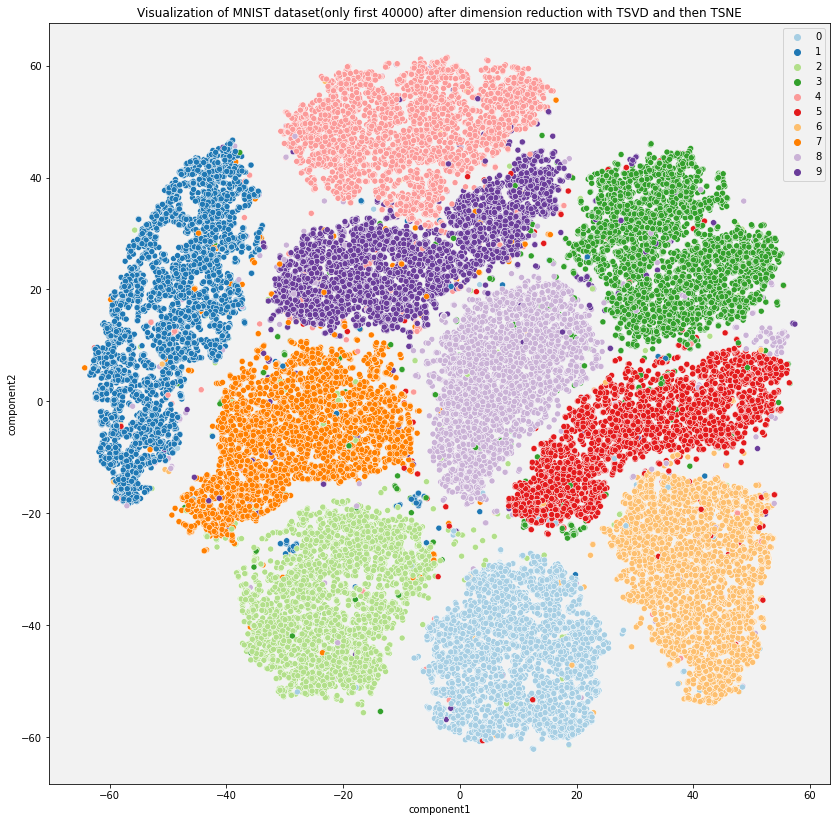

In [ ]:
import seaborn as sns
plt.figure(figsize=(14, 14))
plt.title('Visualization of MNIST dataset(only first 40000) after dimension reduction with TSVD and then TSNE')
sns.scatterplot("component1", "component2", data=tsne_train, hue=y_train[:40000], palette="Paired", legend="full")
plt.legend();

As you can clearly see in the scatterplot, all the digits are close to each other. <br>
And also we can see the noises clearly, for example there are lots of 7 in cluster for number 1, because they look the same. <br>
This scatter plot can ensure us that our new dataset is aceptable and we can believe in it and perform decision tree. <br>

Train Data Purity : 100.0%
Train Data Rand-Index : 100.0%
Test Data Purity : 96.49%
Test Data Rand-Index : 92.37%


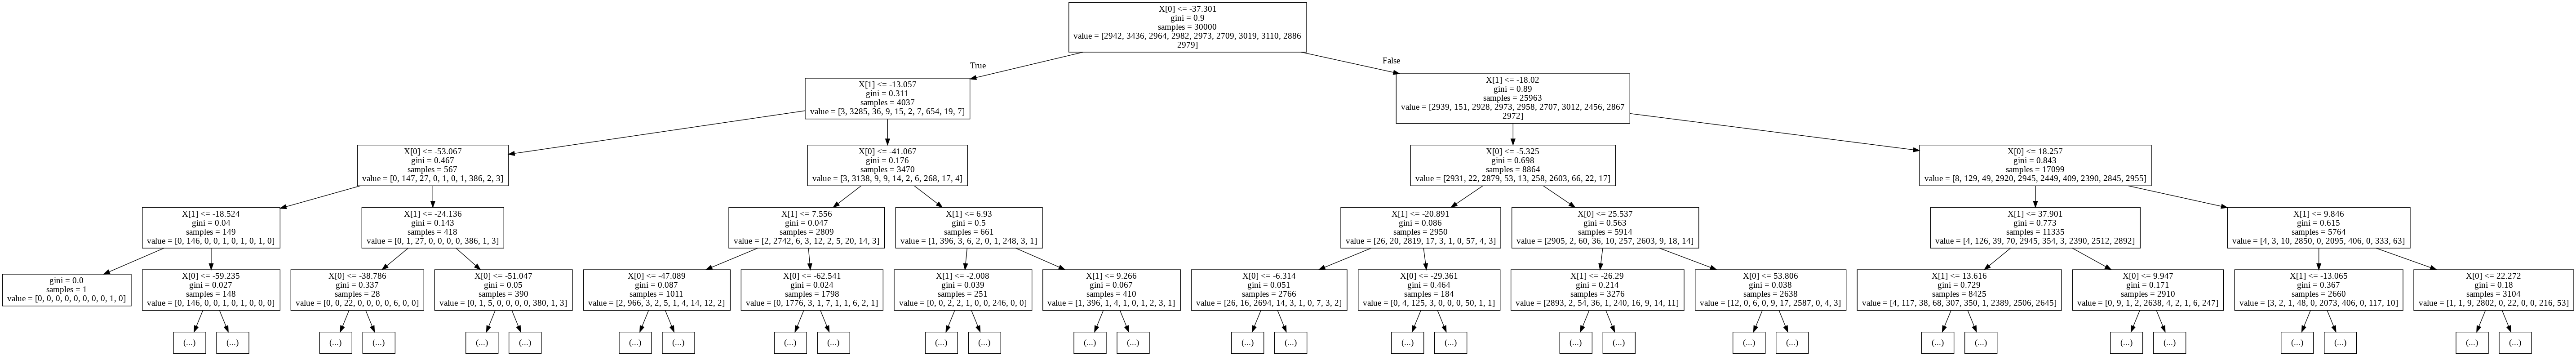

In [ ]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(tsne_train, y_train[:40000])
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_new, y_train_new)
train_predict = decision_tree.predict(X_train_new)
test_predict = decision_tree.predict(X_test_new)

train_purity = accuracy_score(train_predict, y_train_new)
train_rand_index = adjusted_rand_score(train_predict, y_train_new)
test_purity = accuracy_score(test_predict, y_test_new)
test_rand_index = adjusted_rand_score(test_predict, y_test_new)
print(f'Train Data Purity : {round(train_purity * 100, 2)}%')
print(f'Train Data Rand-Index : {round(train_rand_index * 100, 2)}%')
print(f'Test Data Purity : {round(test_purity * 100, 2)}%')
print(f'Test Data Rand-Index : {round(test_rand_index * 100, 2)}%')
visualize_tree(decision_tree, 4)

Finally, in the code above, we perform decision tree on our new dataset and we see a huge increase in purity and rand-index for our test data. <br>
So we can infer that this approach was a good approach to improve our leaning.
Before dimension reduction, we get 75% rand-index but now we are getting 92%. <br>
and note that I only choose 40 thousand of train data and reduced them to 50 dimension at first. For sure if we increase these two amounts (with cost of taking about one day to one week for computing 😀) we can get more accuracy for our test data.